In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "../CSV/diabetes.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


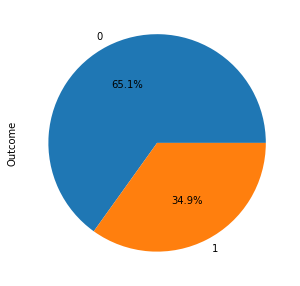

In [8]:
plt.figure(figsize=(5,5))
df["Outcome"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [8]:
def create_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

### Naive Aggregation

In [12]:
lr = LogisticRegression()
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion="entropy")

In [13]:
model_list = [('lr',lr),('dt1',dt1),('dt2',dt2)]

In [14]:
from sklearn.ensemble import VotingClassifier

<h5>1) Hard voting</h5>

In [17]:
vc_hard =  VotingClassifier(estimators=model_list)

In [19]:
create_model(vc_hard)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       146
           1       0.71      0.59      0.65        85

    accuracy                           0.76       231
   macro avg       0.75      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt1',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None...
                             ('dt2',
   

<h5>2) Soft voting</h5>

In [21]:
vc_soft = VotingClassifier(estimators=model_list,voting='soft')

In [22]:
create_model(vc_soft)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       146
           1       0.69      0.55      0.61        85

    accuracy                           0.74       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt1',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None...
                             ('dt2',
   

### Bootstrap Aggregation

In [12]:
from sklearn.ensemble import BaggingClassifier

<h5>1) Bagging </h5>

In [16]:
# use odd number of n_estimators for better output
bg1 = BaggingClassifier(LogisticRegression(),n_estimators=11,random_state=1)

In [17]:
create_model(bg1)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       146
           1       0.76      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=11, n_jobs=None,
                  oob_score=False, random_state=1, ver

In [34]:
bg2 = BaggingClassifier(DecisionTreeClassifier(),n_estimators=900,random_state=1)

In [35]:
create_model(bg2)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       146
           1       0.75      0.64      0.69        85

    accuracy                           0.79       231
   macro avg       0.78      0.76      0.76       231
weighted avg       0.78      0.79      0.78       231



BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

<h5>2) Pasting</h5>

In [35]:
bg3 = BaggingClassifier(LogisticRegression(),n_estimators=7,random_state=1,bootstrap=False)

In [36]:
create_model(bg3)

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=7, n_jobs=None, oob_score=False,
                  random_state=1, ver

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf1 = RandomForestClassifier(n_estimators=13)

In [45]:
create_model(rf1)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       146
           1       0.73      0.60      0.66        85

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [150]:
rf2 = RandomForestClassifier(n_estimators=13,max_features=5,random_state=1)

In [151]:
create_model(rf2)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       146
           1       0.71      0.66      0.68        85

    accuracy                           0.77       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [180]:
rf3 = RandomForestClassifier(n_estimators=13,max_depth=15,random_state=1)

In [181]:
create_model(rf3)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       146
           1       0.76      0.71      0.73        85

    accuracy                           0.81       231
   macro avg       0.80      0.79      0.79       231
weighted avg       0.81      0.81      0.81       231



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

### Stacking

In [182]:
from mlxtend.classifier import StackingClassifier

In [183]:
lr = LogisticRegression()
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion="entropy")
model_list = [lr,dt1,dt2]

In [184]:
# meta classifier model --> Logistic Reg 
meta_lr = LogisticRegression()

In [185]:
stack1 =  StackingClassifier(classifiers=model_list,meta_classifier=meta_lr)

In [186]:
create_model(stack1)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       146
           1       0.70      0.59      0.64        85

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='warn', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                DecisionTreeClassifier(class_weight=None,
                                                       criterion='gini',
                    

In [188]:
stack1.meta_clf_.coef_

array([[0.46143284, 3.75889513, 3.75889513]])

In [189]:
# meta classifier model --> Decision Tree
meta_dt = DecisionTreeClassifier()

In [190]:
stack2 =  StackingClassifier(classifiers=model_list,meta_classifier=meta_dt)

In [191]:
create_model(stack2)

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       146
           1       0.57      0.52      0.54        85

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.67      0.68      0.68       231



StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='warn', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                DecisionTreeClassifier(class_weight=None,
                                                       criterion='gini',
                    

In [193]:
stack2.meta_clf_.feature_importances_

array([0., 1., 0.])

# BOOSTING

### ADA Boosting / Adaptive Boosting

In [9]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
ada = AdaBoostClassifier(n_estimators=200)
create_model(ada)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       146
           1       0.77      0.67      0.72        85

    accuracy                           0.81       231
   macro avg       0.80      0.78      0.78       231
weighted avg       0.80      0.81      0.80       231



AdaBoostClassifier(n_estimators=200)

### Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
gb1 = GradientBoostingClassifier(n_estimators=100)
create_model(gb1)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       146
           1       0.76      0.65      0.70        85

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.77       231
weighted avg       0.79      0.80      0.79       231



GradientBoostingClassifier()

In [45]:
gb2 = GradientBoostingClassifier(n_estimators=100,min_samples_leaf=6)
create_model(gb2)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       146
           1       0.77      0.64      0.70        85

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



GradientBoostingClassifier(min_samples_leaf=6)

In [50]:
gb3 = GradientBoostingClassifier(n_estimators=100,max_depth=3)
create_model(gb3)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       146
           1       0.76      0.65      0.70        85

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.77       231
weighted avg       0.79      0.80      0.79       231



GradientBoostingClassifier()

In [57]:
gb4 = GradientBoostingClassifier(n_estimators=100,max_features=3)
create_model(gb4)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       146
           1       0.79      0.66      0.72        85

    accuracy                           0.81       231
   macro avg       0.80      0.78      0.79       231
weighted avg       0.81      0.81      0.81       231



GradientBoostingClassifier(max_features=3)

### Xtreme Gradient Boosting

In [23]:
from xgboost import XGBClassifier

In [40]:
xgb1 = XGBClassifier(n_estimators=100,reg_alpha=1)
create_model(xgb1)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       146
           1       0.75      0.64      0.69        85

    accuracy                           0.79       231
   macro avg       0.78      0.76      0.76       231
weighted avg       0.78      0.79      0.78       231



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
xgb2 = XGBClassifier(n_estimators=100,reg_lambda=2)
create_model(xgb2)

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       146
           1       0.70      0.66      0.68        85

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)